In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
# url
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

df = pd.read_csv(url)

df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


### Check data types

In [3]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

In [4]:
df['Price-binned'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

### CPU_Frequency vs. Price

Correlation Value:  0.36667


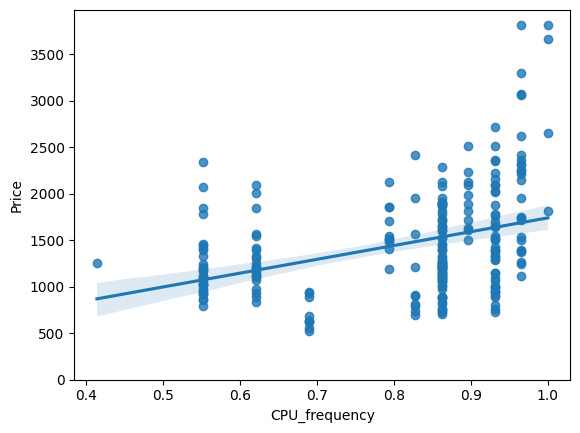

In [26]:
# correlation
res = df[['CPU_frequency', 'Price']].corr()
cor_val = res.loc['CPU_frequency', 'Price']

# Regression plot
sns.regplot(data=df, x='CPU_frequency', y='Price')
plt.ylim(0,)

print("Correlation Value: ", round(cor_val, 5))


### Screen_Size_inch vs. Price

Correlation Value:  -0.11064


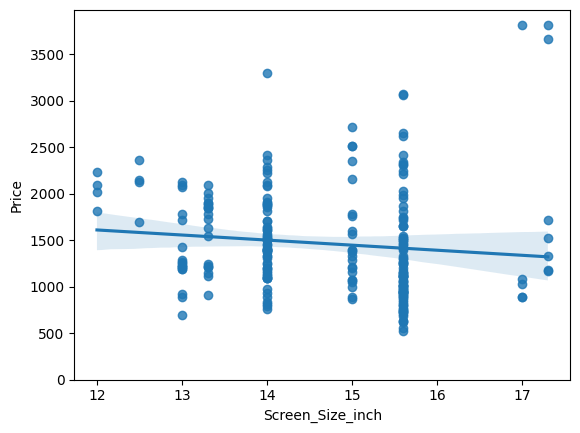

In [27]:
# correlation
res = df[['Screen_Size_inch', 'Price']].corr()
cor_val = res.loc['Screen_Size_inch', 'Price']

# Regression plot
sns.regplot(data=df, x='Screen_Size_inch', y='Price')
plt.ylim(0,)

print("Correlation Value: ", round(cor_val, 5))

### Weight_pounds vs. price

Correlation Value:  -0.05031


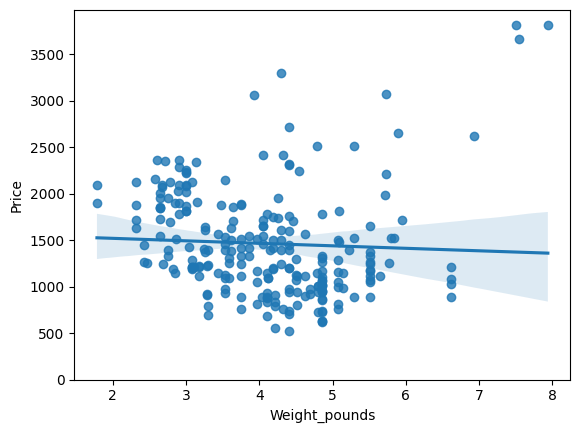

In [28]:
# correlation
res = df[['Weight_pounds', 'Price']].corr()
cor_val = res.loc['Weight_pounds', 'Price']

# Regression plot
sns.regplot(data=df, x='Weight_pounds', y='Price')
plt.ylim(0,)

print("Correlation Value: ", round(cor_val, 5))

In [31]:
df[['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds', 'Price']].corr()[['Price']]

,Price
CPU_frequency,0.366666
Screen_Size_inch,-0.110644
Weight_pounds,-0.050312
Price,1.000000


### Summary
- CPU-Frequency has a 36% positive correlation with the price.
- Screen-Size-inch and Weight-pounds have a -11% and -5% negative correlation respectively with the price. This shows a weak correlation with the price.

# Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

### Box plot for Category

<Axes: xlabel='Category', ylabel='Price'>

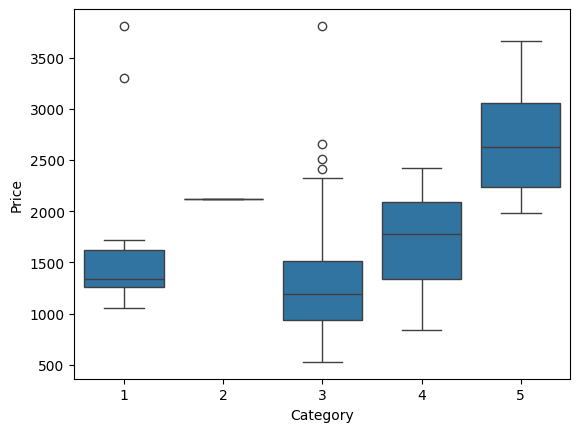

In [32]:
sns.boxplot(data=df, x='Category', y='Price')

### Box plot for GPU vs. Price

<Axes: xlabel='GPU', ylabel='Price'>

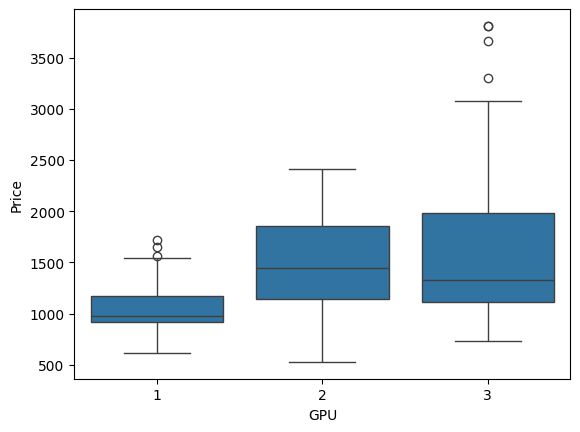

In [39]:
sns.boxplot(data=df, x='GPU', y='Price')

### Box plot for OS vs. Price

<Axes: xlabel='OS', ylabel='Price'>

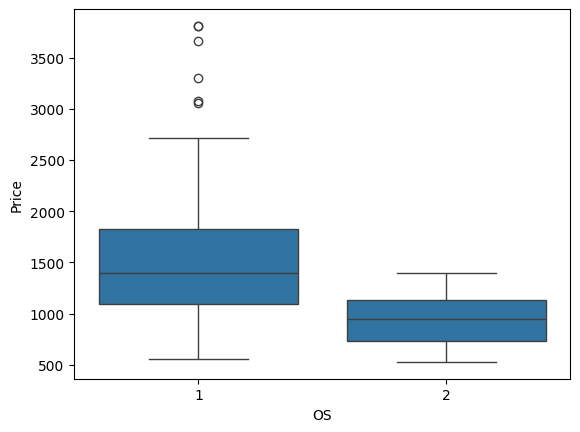

In [40]:
sns.boxplot(data=df, x='OS', y='Price')

### Box plot for CPU Core and Price

<Axes: xlabel='CPU_core', ylabel='Price'>

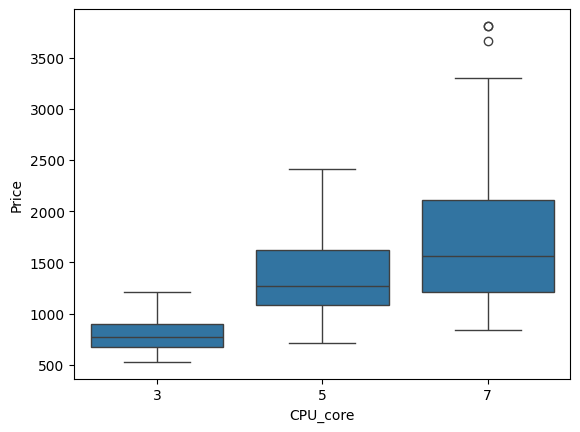

In [43]:
sns.boxplot(data=df, x='CPU_core', y='Price')

### Box plot for RAM_GB and Price

<Axes: xlabel='RAM_GB', ylabel='Price'>

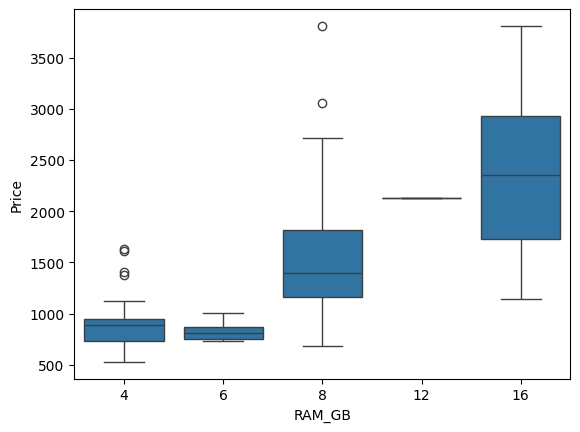

In [41]:
sns.boxplot(data=df, x='RAM_GB', y='Price')

### Box plot for Storage_GB_SSD and Price

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

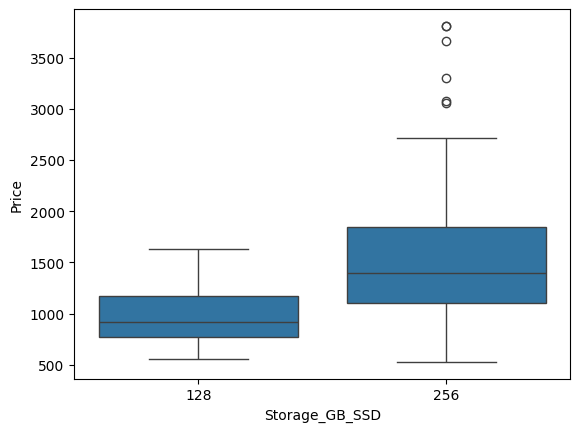

In [44]:
sns.boxplot(data=df, x='Storage_GB_SSD', y='Price')

# Task 2 - Descriptive Statistical Analysis
Generate the statistical description of all the features being used in the data set. Include "object" data types as well.

In [48]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [47]:
# 
df.describe(include='object')

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

In [53]:
df_gptest = df[['GPU', 'CPU_core', 'Price']].groupby(['GPU', 'CPU_core'], as_index=False).mean()

df_gptest

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [56]:
# pivot
pivot = df_gptest.pivot(index='GPU', columns='CPU_core')
pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

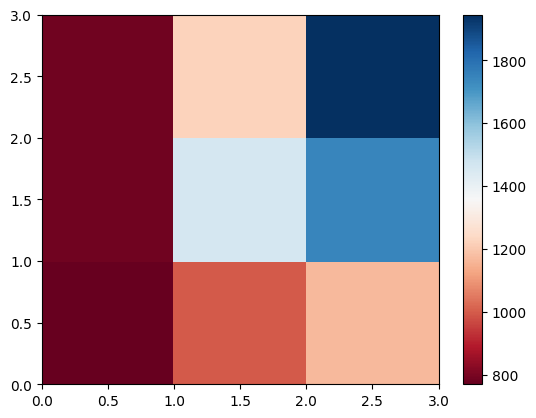

In [58]:
# Heat map
plt.pcolor(pivot, cmap='RdBu')
plt.colorbar()

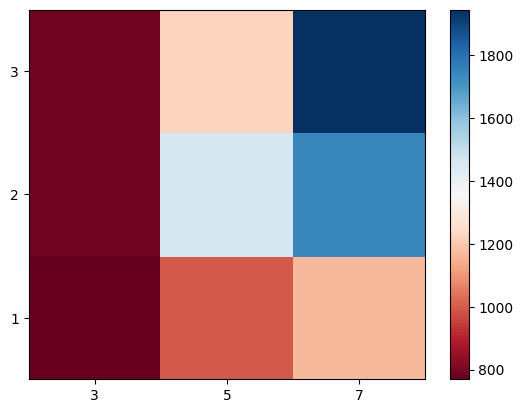

In [59]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot, cmap='RdBu')

#label names
row_labels = pivot.columns.levels[1]
col_labels = pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.

### GPU vs. Price

In [60]:
# Pearsonr Correlation
cf, p_value = stats.pearsonr(df['GPU'], df['Price'])
print("Coefficient: ", cf, "P-Value: ", p_value)

Coefficient:  0.2882981988881427 P-Value:  6.16694969836452e-06


### CPU_core vs. Price

In [61]:
cf, p_value = stats.pearsonr(df['CPU_core'], df['Price'])
print("Coefficient: ", cf, "P-Value: ", p_value)

Coefficient:  0.45939777733551157 P-Value:  7.912950127009089e-14


In [67]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("Coefficient: ", pearson_coef, '\t', "P-Value: ", p_value)
    print("-----------------------")

RAM_GB
Coefficient:  0.5492972971857842 	 P-Value:  3.681560628842986e-20
-----------------------
CPU_frequency
Coefficient:  0.36666555892588604 	 P-Value:  5.5024633507134316e-09
-----------------------
Storage_GB_SSD
Coefficient:  0.24342075521810294 	 P-Value:  0.00014898923191724212
-----------------------
Screen_Size_inch
Coefficient:  -0.11064420817118267 	 P-Value:  0.08853397846830766
-----------------------
Weight_pounds
Coefficient:  -0.05031225837751548 	 P-Value:  0.43976938534338944
-----------------------
CPU_core
Coefficient:  0.45939777733551157 	 P-Value:  7.912950127009089e-14
-----------------------
OS
Coefficient:  -0.22172980114827398 	 P-Value:  0.0005696642559246697
-----------------------
GPU
Coefficient:  0.2882981988881427 	 P-Value:  6.16694969836452e-06
-----------------------
Category
Coefficient:  0.28624275581264147 	 P-Value:  7.225696235806464e-06
-----------------------
